<a href="https://colab.research.google.com/github/skolix15/Machine_Learning_2025/blob/main/Exercise_two_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, plot_tree
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

# Load Dataset (Question 1)

In [87]:
df = pd.read_csv('water_potability.csv')
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


# Plot Variables (Question 1)

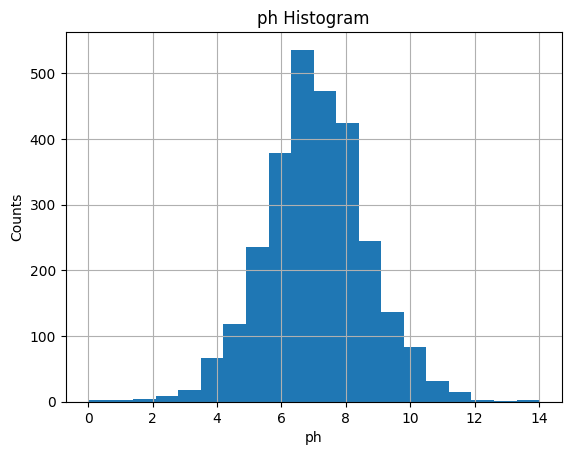

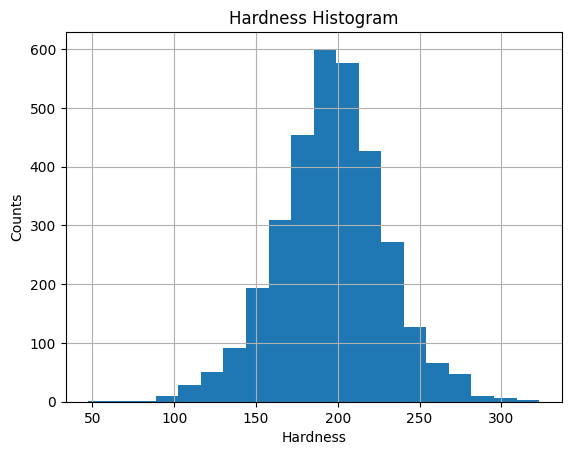

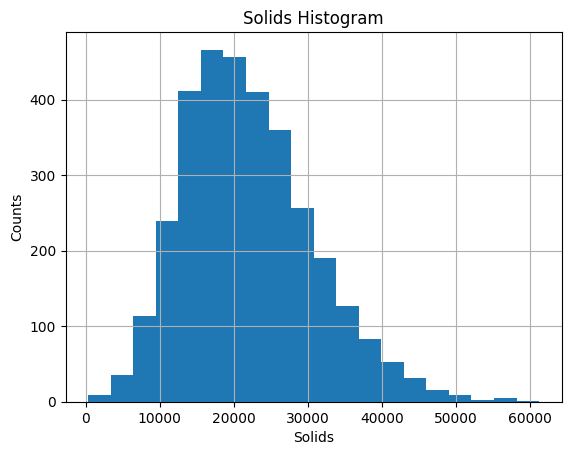

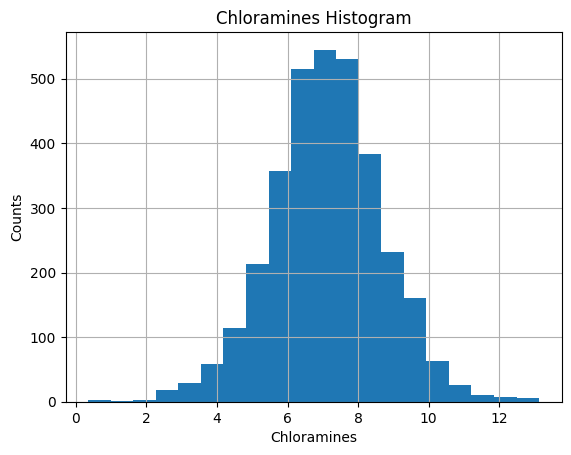

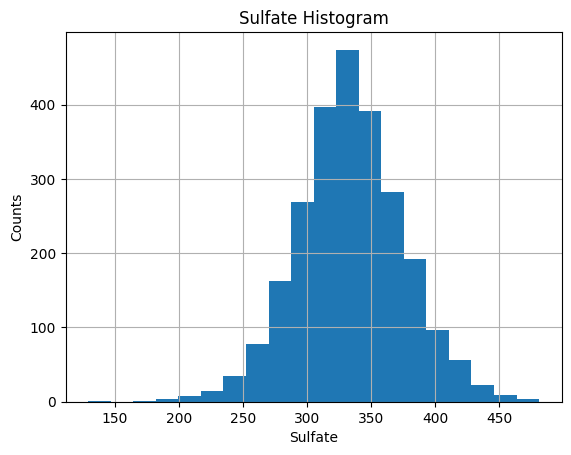

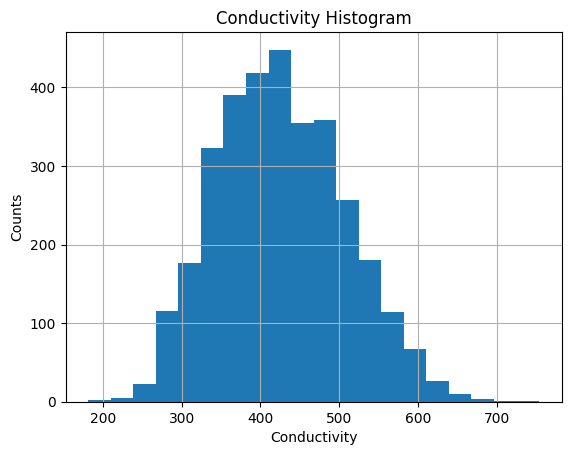

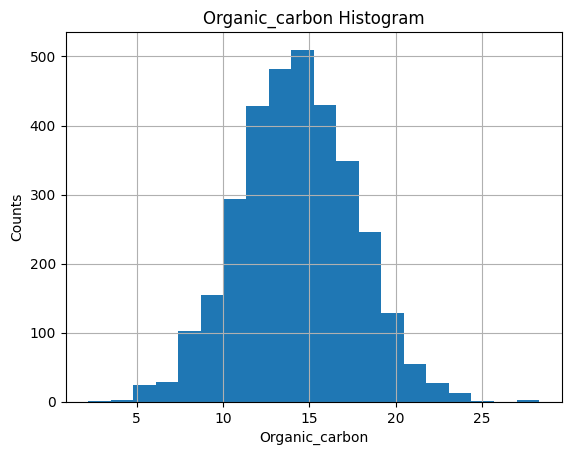

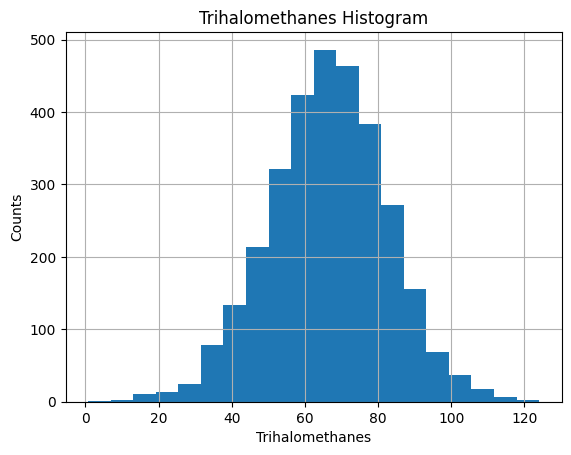

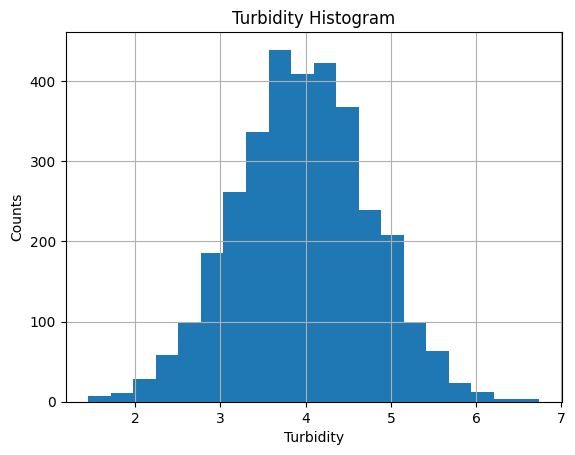

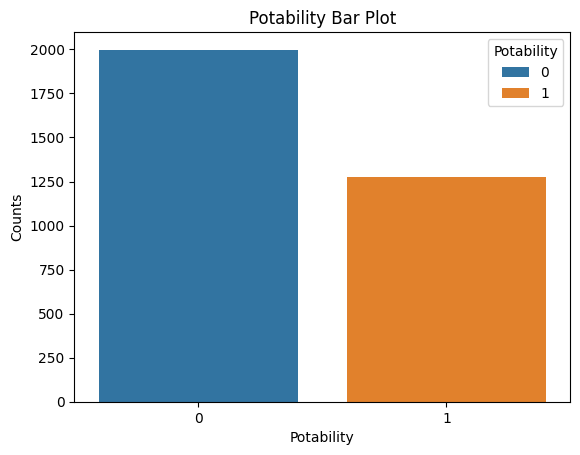

In [88]:
# Get all characteristics from dataset in a list and iterate this list
for characteristic in df.columns.tolist()[:-1]:  # [:-1] -> will exclude Outcome value

  # Create histogram for each characteristic
  df[characteristic].hist(bins=20)
  plt.title(f'{characteristic} Histogram')
  plt.xlabel(characteristic)
  plt.ylabel('Counts')
  plt.show()
  print("\n")

# Outcome - Bar Plot
sns.countplot(x='Potability', data=df, hue='Potability')
# df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Potability Bar Plot')
plt.xlabel('Potability')
plt.ylabel('Counts')
plt.show()

# Missing values - Potability Perchantages - Quality of Data (Question 1)

In [89]:
# Calculate missing values
missing_values = df.isna().sum()

# Print missing values
print(f"Missing values per column:\n\n{missing_values}\n")

# Calculate potability percentages
total_samples = len(df)
potable_count = df[df["Potability"] == 1].shape[0]
non_potable_count = df[df["Potability"] == 0].shape[0]

potable_percentage = (potable_count / total_samples) * 100
non_potable_percentage = (non_potable_count / total_samples) * 100

# Print results
print(f"Total samples: {total_samples}")
print(f"Potable water samples: {potable_count} ({potable_percentage:.2f}%)")
print(f"Non-potable water samples: {non_potable_count} ({non_potable_percentage:.2f}%)")

Missing values per column:

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Total samples: 3276
Potable water samples: 1278 (39.01%)
Non-potable water samples: 1998 (60.99%)


Συνολικά 3 χαρακτηριστικά περιέχουν ελλείπουσες τιμές. Αυτά είναι τα ph, Sulfate, Trihalomethanes.

ph -> 491
Suldate -> 781
Trihalomethanes -> 162

Τα ποσοστά πόσιμου και μη πόσιμου νερού των παραδειγμάτων είναι:

Πόσιμο νερό: 39.01%
Μη πόσιμο νερό: 60.99%

Η ποιότητα των δεδομένων δεν είναι πλήρως ικανοποιητική. Υπάρχουν αρκετές ελλειπείς τιμές σε τρία βασικά χαρακτηριστικά (ph, Suldate, Trihalomethanes). Κάτι τέτοιο μπορεί να επηρεάσει την αξιοπιστία των αποτελεσμάτων ή να οδηγήσει στην δημιουργία μη αποτελεσματικών μοντέλων.

Τέλος, η μεταβλητή Potability (πόσιμο - μη πόσιμο νερό) δεν έχει ισορροπία στην κατανομή της (39% πόσιμο, 61% μη πόσιμο). Λόγω αυτού, ενδέχεται να προκληθεί προκατάληψη στους ταξινομητές προς την κατηγορία του μη πόσιμου νερού.

# Perchentages of potability water (Question 2)

In [90]:
# Drop NaN values from ph
df = df.dropna(subset=["ph"]).copy()

# Create ph groups
ph_groups = pd.cut(
    df["ph"],
    bins=[-float("inf"), 6.5, 8.5, float("inf")],
    labels=["< 6.5", "6.5 - 8.5", "> 8.5"]
)

# Insert ph groups in the data
df["ph_category"] = ph_groups

# Prepare data for calculation
# First grouping rows by both ph_category and Potability
# Then counts the number of rows pes combination
# Finally, reshapes the result so Potability values become columns (0, 1 -> 2 columns)
# In the last step, fill_value=0 ensures no missing combinations
summary = df.groupby(["ph_category", "Potability"], observed=False).size().unstack(fill_value=0)


# Insert perchentaages

# Calculate sum row-wise -> axis=1 is calculating sum across columns
summary["Total"] = summary.sum(axis=1)
# Calculate perchentage of potable samples
summary["% Potable"] = ((summary[1] / summary["Total"]) * 100).round(2)
# Calculate perchentage of not potable samples
summary["% Non-potable"] = ((summary[0] / summary["Total"]) * 100).round(2)

# Print results
print(summary)


Potability     0    1  Total  % Potable  % Non-potable
ph_category                                           
< 6.5        612  356    968      36.78          63.22
6.5 - 8.5    745  583   1328      43.90          56.10
> 8.5        327  162    489      33.13          66.87


Με βάση τα δεδομένα παραπάνω (πινακάκι) φαίνεται ότι στις κατηγορίες ph < 6.5 και ph > 8.5 η καθοδήγηση του ΠΟΥ επαληθεύεται (Το ποσοστό μη πόσιμου νερού είναι πολύ μεγαλύτερο από αυτό του πόσιμου ενώ το ποσοστό του πόσιμου νερού είναι πολύ χαμηλό). Στην ενδιάμεση κατηγορία (6.5 - 8.5) το ποσοστό πόσιμου νερού φαίνεται να είναι μεγαλύτερο σε σχέση με τις άλλες κατηγορίες αλλά αξίζει να σημειωθεί ότι με βάση τα αποτελέσματα παραπάνω, το ποσοστό μη πόσιμου νερού και σε αυτήν την κατηγορία είναι αρεκτά υψηλό (~56%).

Συμπερασματικά:

1. Από τα δεδομένα παραπάνω φαίνεται ότι στις ακραίες τιμές ph (< 6.5, > 8.5) υπάρχει μεγαλύτερη πιθανότητα το νερό να είναι μη πόσιμο.
2. Η ενδιάμεση κατηγορία (6.5 < ph < 8.5) φαίνεται να είναι πιο ισορροπημένη (κάτι το οποίο επιβεβαίωνει εν μέρει την πρόταση του ΠΟΥ) χωρίς όμως η πιθανότητα του πόσιμου νερού να είναι ικανοποιητική.

# Scatter Plot - Ph / Chloramine (Question 3)


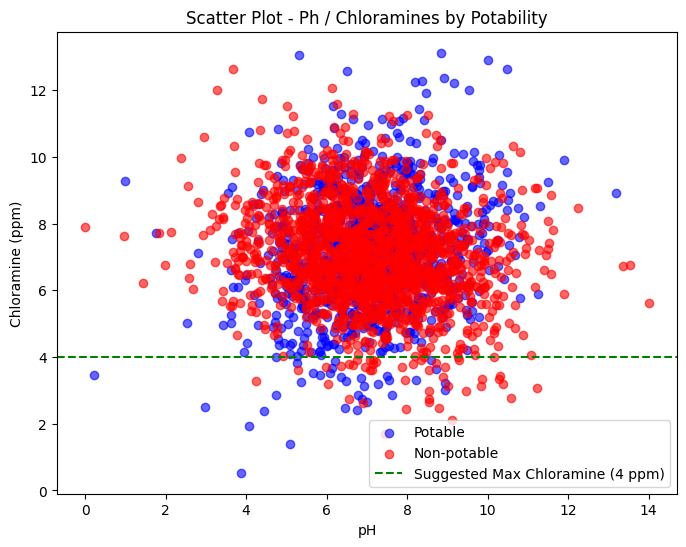

In [91]:
# Get potable and non potable values
potable = df[df['Potability'] == 1]
non_potable = df[df['Potability'] == 0]

# Create scatter plot
plt.figure(figsize=(8,6))
plt.scatter(potable['ph'], potable['Chloramines'], color='blue', label='Potable', alpha=0.6)
plt.scatter(non_potable['ph'], non_potable['Chloramines'], color='red', label='Non-potable', alpha=0.6)

# Set suggested Chloramine value
plt.axhline(y=4, color='green', linestyle='--', label='Suggested Max Chloramine (4 ppm)')

# Set labels, title, legend and show scatter plot
plt.xlabel('pH')
plt.ylabel('Chloramine (ppm)')
plt.title('Scatter Plot - Ph / Chloramines by Potability')
plt.legend()
plt.show()



Διαπιστώσεις:

1. Παρόλο που ο ΠΟΥ προτείνει έπίπεδα χλωραμίνης ως 4ppm, βλέπουμε αρκετά μη πόσιμα δείγματα εντός αυτού του range.
2. Τα δεδομένα φαίνεται να συγκεντρώνονται έντονα μεταξύ των τιμών pH 6-9 (Πόσιμα και μη πόσιμα). Δεν υπάρχει καθαρή διαχωρισιμότητα με βάση το pH.
3. Δεν είναι εφικτό να βγάλουμε ασφαλή συμπράσματα ποσιμότητας με βάση την σχέση των δύων αυτών χαρακτηριστικών (pH, Chloramines).

# Fill NaN values (Question 4)

In [92]:
# Print number of NaN values
print(df.isna().sum())

# Fill null values with the mean value
df = df.fillna(df.mean(numeric_only=True))

# Print number of NaN values (No NaN value should exist)
print(df.isna().sum())



ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            669
Conductivity         0
Organic_carbon       0
Trihalomethanes    136
Turbidity            0
Potability           0
ph_category          0
dtype: int64
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
ph_category        0
dtype: int64


# Create numpy arrays - Separate train and test data (Question 5)

In [93]:
# Set characteristics (inputs) (Numpy array)
x = df.drop(columns=["Potability", "ph_category"]).to_numpy()

# Set target (Numpy array)
y = df["Potability"].to_numpy()

# Separate train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Print results
print("X train:", x_train.shape)
print("X test:", x_test.shape)
print("Y train:", y_train.shape)
print("Y test:", y_test.shape)


X train: (1949, 9)
X test: (836, 9)
Y train: (1949,)
Y test: (836,)


# Train Decision Tree - Calculate Accuracy (Question 6)

In [94]:
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier(random_state=0) # random_state = seed

# Train decision tree classifier
clf.fit(x_train, y_train)

# Make prediction
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print result
print(f"Accuracy: {round(accuracy, 2)}")

Accuracy: 0.6


# Train Decision Tree with extra parameters (Question 7)


In [95]:
# Set parameters
criteria = ["gini", "entropy"]
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, "sqrt"]
ccp_alphas = [0, 0.01]

# Create the whole parameters' combinations
param_combinations = list(product(
    criteria,
    max_depths,
    min_samples_splits,
    min_samples_leafs,
    max_features_list,
    ccp_alphas
))

# Initialize results list
results = []

# Iterate combinations and get each time, the respective values
for (criterion, max_depth, min_split, min_leaf, max_feat, alpha) in param_combinations:

  # Create Decision Tree Classifier object (with extra parameters)
  clf = DecisionTreeClassifier(
    criterion=criterion,
    max_depth=max_depth,
    min_samples_split=min_split,
    min_samples_leaf=min_leaf,
    max_features=max_feat,
    ccp_alpha=alpha,
    random_state=0
  )

  # Train decision tree classifier
  clf.fit(x_train, y_train)

  # Make prediction
  y_pred = clf.predict(x_test)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)

  # Parameters explanation (For me)
  #
  # criterion:
  #
  #   Gini -> Gini impurity: Calculates how much "clean" is the split
  #   Entropy -> Information Gain: Calculates the quantity of information you gain from split
  #
  # max_depth:
  #
  #   Tree's max depth
  #
  # min_samples_split:
  #
  #   The minumum number of samples that need in order to split the internal node
  #   Example: min_samples_split=5 -> No split would happen if less than 5 samples exist in a node
  #
  # min_samples_leaf:
  #
  #   The minumum number of samples that need a leaf to have
  #
  # max_features:
  #
  # How many features will be tested in each split
  #
  # ccp_alpha:
  #
  # Parameter for tree cut (pruning) -> Set penalty for complicated trees

  results.append({
        "criterion": criterion,
        "max_depth": max_depth,
        "min_samples_split": min_split,
        "min_samples_leaf": min_leaf,
        "max_features": max_feat,
        "ccp_alpha": alpha,
        "accuracy": round(accuracy, 2),
    })

# Create Pandas Data Frame with results
results_df = pd.DataFrame(results)

# Print results Data Frame
print(results_df)

   criterion  max_depth  min_samples_split  min_samples_leaf max_features  \
0       gini        NaN                  2                 1         None   
1       gini        NaN                  2                 1         None   
2       gini        NaN                  2                 1         sqrt   
3       gini        NaN                  2                 1         sqrt   
4       gini        NaN                  2                 2         None   
..       ...        ...                ...               ...          ...   
91   entropy        5.0                  5                 1         sqrt   
92   entropy        5.0                  5                 2         None   
93   entropy        5.0                  5                 2         None   
94   entropy        5.0                  5                 2         sqrt   
95   entropy        5.0                  5                 2         sqrt   

    ccp_alpha  accuracy  
0        0.00      0.60  
1        0.01      0.61

# Question 8

Best combination (max_depth = 3):

criterion            gini
max_depth             3.0
min_samples_split       2
min_samples_leaf        1
max_features         None
ccp_alpha             0.0
accuracy             0.63
Name: 16, dtype: object




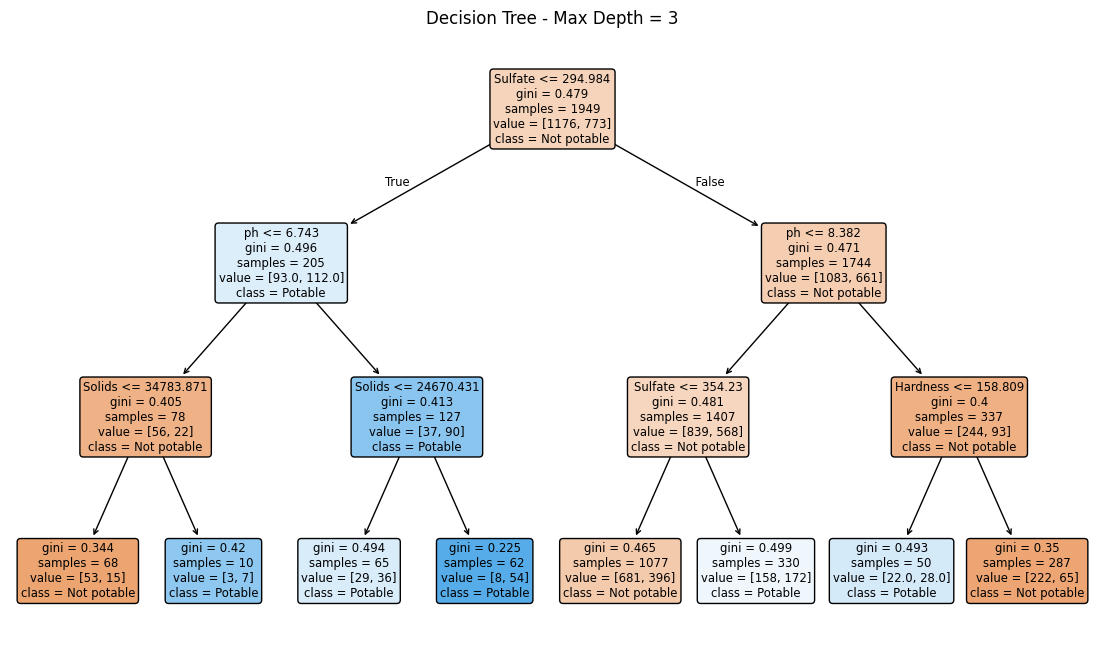



|--- Sulfate <= 294.98
|   |--- ph <= 6.74
|   |   |--- Solids <= 34783.87
|   |   |   |--- class: 0
|   |   |--- Solids >  34783.87
|   |   |   |--- class: 1
|   |--- ph >  6.74
|   |   |--- Solids <= 24670.43
|   |   |   |--- class: 1
|   |   |--- Solids >  24670.43
|   |   |   |--- class: 1
|--- Sulfate >  294.98
|   |--- ph <= 8.38
|   |   |--- Sulfate <= 354.23
|   |   |   |--- class: 0
|   |   |--- Sulfate >  354.23
|   |   |   |--- class: 1
|   |--- ph >  8.38
|   |   |--- Hardness <= 158.81
|   |   |   |--- class: 1
|   |   |--- Hardness >  158.81
|   |   |   |--- class: 0

0 294.98402404785156
1 6.7433922290802
2 34783.87109375
3 -2.0
4 -2.0
5 24670.4306640625
6 -2.0
7 -2.0
8 8.38163709640503
9 354.2295837402344
10 -2.0
11 -2.0
12 158.80886840820312
13 -2.0
14 -2.0


In [96]:
# Get trees with max depth = 3
max_depth_3_df = results_df[results_df["max_depth"] == 3]

# Select combination with the maximum accuracy and max depth = 3
best_comb_q_8 = max_depth_3_df.loc[max_depth_3_df["accuracy"].idxmax()]

# Print result
print(f"Best combination (max_depth = 3):\n\n{best_comb_q_8}\n\n")

# Create new Decision Tree Classifier with the parameters of the best combination
clf_best_q_8 = DecisionTreeClassifier(
    criterion=best_comb_q_8["criterion"],
    max_depth=int(best_comb_q_8["max_depth"]),
    min_samples_split=best_comb_q_8["min_samples_split"],
    min_samples_leaf=best_comb_q_8["min_samples_leaf"],
    max_features=best_comb_q_8["max_features"],
    ccp_alpha=best_comb_q_8["ccp_alpha"],
    random_state=0
)

# Train model
clf_best_q_8.fit(x_train, y_train)

# Represent Decision Tree
plt.figure(figsize=(14,8))
plot_tree(
  clf_best_q_8,
  feature_names=df.drop(columns=["Potability", "ph_category"]).columns,
  class_names=["Not potable", "Potable"],
  filled=True,
  rounded=True
)
plt.title("Decision Tree - Max Depth = 3")
plt.show()


feature_names = df.drop(columns=["Potability", "ph_category"]).columns
print("\n\n" + export_text(clf_best_q_8, feature_names=feature_names))

for i, threshold in enumerate(clf_best_q_8.tree_.threshold):
    print(i, threshold)



# Description of decision tree's rules (Question 8)

Κανόνες:

1. Sulfate ≤ 294.984 && pH ≤ 6.743 && Solids ≤ 34783.871 ⇒ Not Potable
2. Sulfate ≤ 294.984 && pH ≤ 6.743 && Solids > 34783.871 ⇒ Potable
3. Sulfate ≤ 294.984 && pH > 6.743 && Solids ≤ 24670.431 ⇒ Potable
4. Sulfate ≤ 294.984 && pH > 6.743 && Solids > 24670.431 ⇒ Potable
5. Sulfate > 294.984 && pH ≤ 8.382 && Sulfate ≤ 354.23 ⇒ Not Potable
6. Sulfate > 294.984 && pH ≤ 8.382 && Sulfate > 354.23 ⇒ Potable
7. Sulfate > 294.984 && pH > 8.382 && Hardness ≤ 158.809 ⇒ Potable
8. Sulfate > 294.984 && pH > 8.382 && Hardness > 158.809 ⇒ Not Potable

# Question 9

Best combination:

criterion            entropy
max_depth                5.0
min_samples_split          2
min_samples_leaf           1
max_features            None
ccp_alpha                0.0
accuracy                0.65
Name: 80, dtype: object




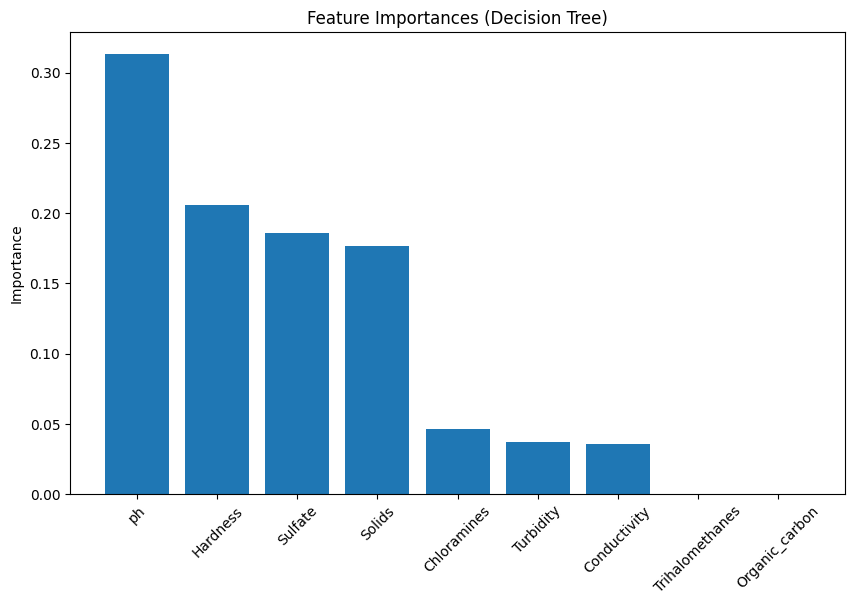

In [97]:
# Select combination with the maximum accuracy
best_comb_q_9 = results_df.loc[results_df["accuracy"].idxmax()]

# Print result
print(f"Best combination:\n\n{best_comb_q_9}\n\n")

# Create new Decision Tree Classifier with the parameters of the best combination
clf_best_q_9 = DecisionTreeClassifier(
    criterion=best_comb_q_9["criterion"],
    max_depth=int(best_comb_q_9["max_depth"]),
    min_samples_split=best_comb_q_9["min_samples_split"],
    min_samples_leaf=best_comb_q_9["min_samples_leaf"],
    max_features=best_comb_q_9["max_features"],
    ccp_alpha=best_comb_q_9["ccp_alpha"],
    random_state=0
)

# Train model
clf_best_q_9.fit(x_train, y_train)

# Get feature importances
feature_importances = clf_best_q_9.feature_importances_
feature_names = df.drop(columns=["Potability", "ph_category"]).columns

# Without classification

# # Create bar chart
# plt.figure(figsize=(10,6))
# plt.title("Feature Importances (Decision Tree)")
# plt.bar(feature_names, feature_importances, color='skyblue')
# plt.xticks(rotation=45)
# plt.ylabel("Importance")
# plt.show()

# With classification

# Classify feature importances
indices = feature_importances.argsort()[::-1]

# Create bar chart
plt.figure(figsize=(10,6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in indices], rotation=45)
plt.ylabel("Importance")
plt.show()

Αν η συσκευή μπορεί να υποστηρίζει μέχρι 5 χημικές αναλύσεις, άρα 5 χαρακτηριστικά, θα πρέπει να επιλέξουμε αυτά που έχουν μεγαλύτερη επίδραση στην πρόβλεψη της μεταβλητής target, δηλαδή της potability. Επομένως, να επιλέξουμε αυτά που έχουν μεγαλύτερη τιμή στην μεταβλητή importance.

Με βάση τον παραπάνω πίνακα, τα χαρακτηριστικά αυτά, κατά σειρά, είναι:

1. pH
2. Hardness
3. Sulfate
4. Solids
5. Chloramines

Τα παραπάνω 5 χαρακτηριστικά είναι αυτά που έχουν τη μεγαλύτερη σημασία στο decision tree για να διαχωρίσει το νερό σε potable και not potable.

# Question 10

Ένα Random Forest ενδέχεται να πετύχαινε καλύτερη ακρίβεια από το Decision Tree καθώς μπορεί και συνδυάζει πολλά δέντρα τα οποία εκπαιδεύονται σε διαφορετικά υποσύνολα των δεδομένων και με τυχαία επιλογή χαρακτηριστικών σε κάθε split.

Έτσι, είναι εφικτό να μειωθεί το overfitting που συναντάται συχνά σε Decistion Trees, να αυξηθεί η ιδιότητα του μοντέλου να γενικεύει και να υπάρχει πιο "στάθερη" πρόβλεψη καθώς επηρεάζεται το μοντέλο λιγότερο από θόρυβο και ακραίες τιμές στα δεδομένα.

# Question 11

In [98]:
results_rf = []

for n_estimators in [50, 100, 200]:

  # Create Decision Tree Classifier object
  rf_clf = RandomForestClassifier(random_state=0, n_estimators=n_estimators)

  # Train decision tree classifier
  rf_clf.fit(x_train, y_train)

  # Make prediction
  y_pred = rf_clf.predict(x_test)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)

  results_rf.append({
      "n_estimators": n_estimators,
      "accuracy": accuracy
  })

# Create Pandas Data Frame with results
results_rf_df = pd.DataFrame(results_rf)

# Print results Data Frame
print(results_rf_df)

   n_estimators  accuracy
0            50  0.666268
1           100  0.675837
2           200  0.687799


# Question 12

Είναι προτιμότερο και ασφαλέστερο, για την δημόσια υγεία, ένα μοντέλο να προβλέπει καλύτερα το μη πόσιμο νερό χάνοντας ακρίβεια στο πόσιμο νερό. Σε περίπτωση λανθασμένης ταξινόμησης μη πόσιμου νερού ως πόσιμου (false negative) μπορεί να καταναλωθεί μη πόσιμο νερό και να υπάρξουν σοβαρές συνέπειες στην δημόσια υγεία.

Αντίθετα, αν πόσιμο νερό χαρακτηριστεί μη πόσιμο (false positive) έχει μικρότερο ρίσκο. Το νερό απλώς θα απορριφθεί χωρίς κάποια επιπλέον ζημία.


# Question 13

Νομικά ασφαλέστερη για μια εταιρεία είναι η χρήση του καλύτερου τυχαίου δάσους. Το Random Forest βασίζεται σε πολλαπλά ανεξάρτητα δέντρα. Συνδυάζοντας τις αποφάσεις τους καταφέρνει να μειώνει τον κίνδυνο υπερεκπαίδευσης  (overfitting), να μειώνει την πιθανότητα σφάλματος εξαιτίας μεμονωμένων ακραίων τιμών ή ελλιπών δεδομένων και τέλος να προσφέρει πιο "σταθερές" προβλέψεις.

Επομένως, λόγω των παραπάνω, μια εταιρεία θα μπορούσε να υποστηρίξει ευκολότερα ότι χρησιμοποιεί ένα ασφαλές, μη αυθαίρετο - αντικειμενικό μοντέλο.
Επίσης, θα μπορούσε να υποστηρίξει ότι οι αποφάσεις που παίρνονται σχετικά με το νερό (πόσιμο - μη πόσιμο) δεν βασίζονται σε τυχαίες προβλέψεις ενός μόνο μοντέλου.